# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../../data_sets/mall.csv')

In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In clustering, there is no Y variable. We don't know it. We can change the problem statement to say something like "based on X, what is the predicted Spending Score?" where spending score will be the Y variable.

In [7]:
X = dataset.iloc[:, [3,4]].values
# All rows, last 2 columns

In [6]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Elbow Method / WCSS

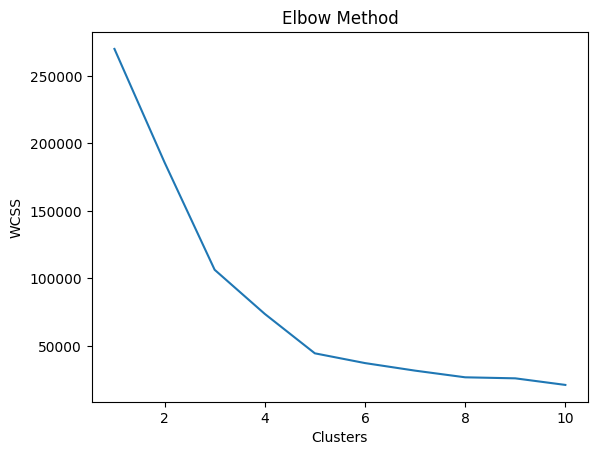

In [33]:
from sklearn.cluster import KMeans

wcss = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
results = pd.DataFrame({
    "Clusters": range(1, 11),
    "WCSS": wcss
})

results["WCSS"] = results["WCSS"].round(2)
results

,Clusters,WCSS
0,1,269981.28
1,2,185917.14
2,3,106348.37
3,4,73679.79
4,5,44454.48
5,6,37233.81
6,7,31632.26
7,8,26686.84
8,9,25925.24
9,10,21045.16


Elbow is about 5, so k = 5

In [52]:
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)

## Visualize Cluster

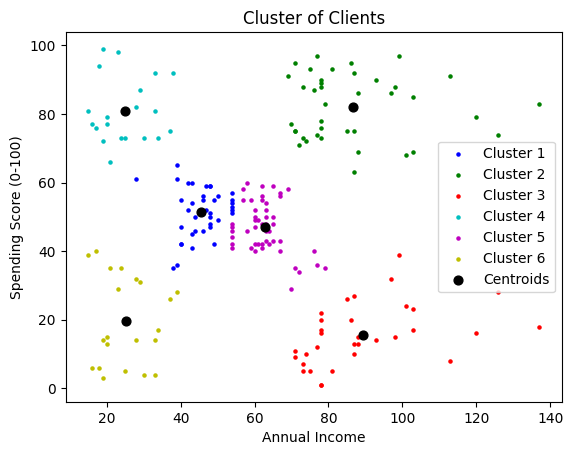

In [64]:
# Visualizing the clusters

colors = [
    'b',  # blue
    'g',  # green
    'r',  # red
    'c',  # cyan
    'm',  # magenta
    'y',  # yellow
]

kmeans = KMeans(n_clusters=len(colors))
y_kmeans = kmeans.fit_predict(X)

for i, color in enumerate(colors):
    plt.scatter(
        X[y_kmeans == i, 0],
        X[y_kmeans == i, 1],
        s=5,
        c=color,
        label=f'Cluster {i+1}'
    )

# Centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=40,
    c='black',
    label='Centroids'
)

plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (0-100)')
plt.legend()
plt.show()

